In [1]:
import tempfile, subprocess, urllib.request, zipfile
import pandas as pd, numpy as np
import datetime
%matplotlib inline
from diagnose import diagnose

## load data and some formatting

In [2]:
with tempfile.TemporaryDirectory() as tmpdir:
    urllib.request.urlretrieve(
        'http://files.grouplens.org/datasets/movielens/ml-100k.zip',
        tmpdir + '/ml-100k.zip')
    zipfile.ZipFile(tmpdir + '/ml-100k.zip').extractall(tmpdir)
    print(subprocess.check_output(['ls', tmpdir+'/ml-100k']).decode('utf-8'))

    interactions = pd.read_csv(
        tmpdir + '/ml-100k/u.data',
        sep='\t',
        names=['USER_ID','ITEM_ID','RATING', 'TIMESTAMP'])

    users = pd.read_csv(
        tmpdir + '/ml-100k/u.user',
        sep='|',
        names=['USER_ID','AGE','GENDER','OCCUPATION','ZIPCODE'],
    )

    items = pd.read_csv(
        tmpdir + '/ml-100k/u.item',
        sep='|', encoding='latin1',
        names=['ITEM_ID', '_TITLE', 'CREATION_TIMESTAMP', '_', '_IMDb_URL'] + ['GENRE.%s'%i for i in range(19)],
    )

allbut.pl
mku.sh
README
u1.base
u1.test
u2.base
u2.test
u3.base
u3.test
u4.base
u4.test
u5.base
u5.test
ua.base
ua.test
ub.base
ub.test
u.data
u.genre
u.info
u.item
u.occupation
u.user



In [3]:
# CREATION_TIMESTAMP may become a reserved keyword and its behavior may change without further notice.
items.loc[items['CREATION_TIMESTAMP'].notnull(), 'CREATION_TIMESTAMP'] = items['CREATION_TIMESTAMP'].dropna().apply(
    lambda x:datetime.datetime.strptime(str(x), '%d-%b-%Y').timestamp())
items.fillna({'CREATION_TIMESTAMP': items['CREATION_TIMESTAMP'].min()}, inplace=True)

## show data template

In [4]:
interactions.head()

,USER_ID,ITEM_ID,RATING,TIMESTAMP
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
users.head()

,USER_ID,AGE,GENDER,OCCUPATION,ZIPCODE
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
items.head()

,ITEM_ID,_TITLE,CREATION_TIMESTAMP,_,_IMDb_URL,GENRE.0,GENRE.1,GENRE.2,GENRE.3,GENRE.4,...,GENRE.9,GENRE.10,GENRE.11,GENRE.12,GENRE.13,GENRE.14,GENRE.15,GENRE.16,GENRE.17,GENRE.18
0,1,Toy Story (1995),788918400.0,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),788918400.0,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),788918400.0,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),788918400.0,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),788918400.0,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## run diagnostics

########################################
# DIAGNOSING INTERACTIONS TABLE, SAMPLE:
########################################
       USER_ID  ITEM_ID  RATING  TIMESTAMP
97126      711       51       4  879994778
74821      437      443       4  880142851
41621      353      346       4  891402757
43909      642      462       4  886455357
55795      655     1074       3  891999461
48780      682     1222       3  888523657
7263       230      633       4  880485283
88531      886      184       4  876031309
13505      346      831       3  875003274
4826       302      328       3  879436844

=== Interactions table, original shape=(100000, 4) ===

missing rate in fields ['USER_ID', 'ITEM_ID', 'TIMESTAMP'] 0.0
dropna shape (100000, 4)
duplication rate 0.0
drop_duplicates shape (100000, 4)
user item repeat rate 0.0

=== Describe interactions table ===

              RATING     TIMESTAMP
count  100000.000000  1.000000e+05
mean        3.529860  8.835289e+08
std         1.125674  5.343856e+06


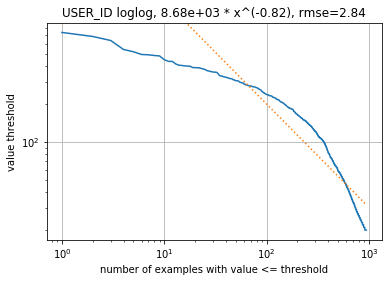


=== ITEM_ID top 10 categories ===
50     583
258    509
100    508
181    507
294    485
286    481
288    478
1      452
300    431
121    429
dtype: int64


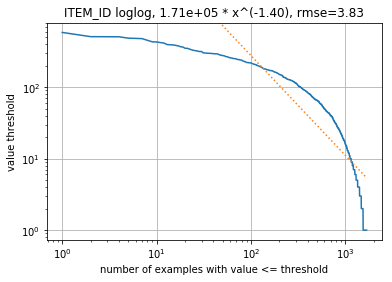


=== Hourly activity pattern ===
0     5172
1     5135
2     4644
3     4853
4     4246
5     4190
6     3500
7     1540
8     1133
9     1951
10    1185
11     637
12     956
13    1662
14    3149
15    3107
16    5426
17    6278
18    6755
19    7112
20    6265
21    8191
22    7231
23    5682
dtype: int64

=== Day of week activity pattern ===
0    13174
1    13933
2    16621
3    13364
4    15918
5    15077
6    11913
dtype: int64


/home/yifeim/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


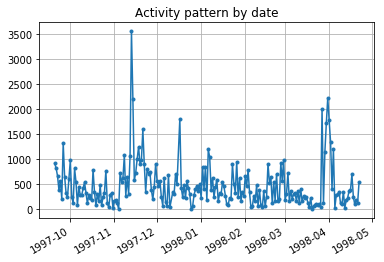

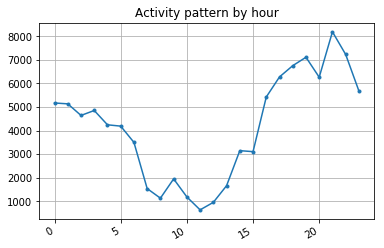

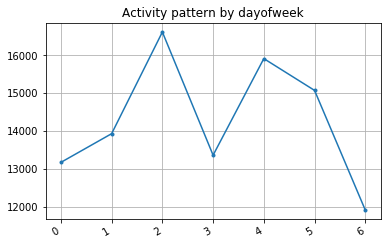


=== Temporal shift analysis ===

temporal out-sample items, freq=1d, hist_len=1, avg_loss=54.5%, time=0.1s
temporal out-sample items, freq=1d, hist_len=10, avg_loss=8.4%, time=0.2s
temporal out-sample items, freq=1d, hist_len=100, avg_loss=2.0%, time=0.2s
temporal out-sample items, freq=1d, hist_len=1000, avg_loss=2.0%, time=0.2s


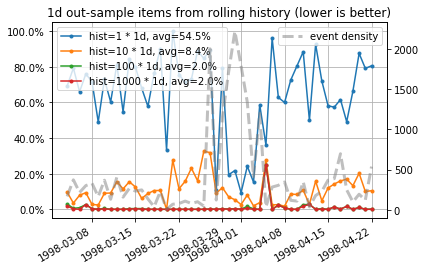

temporal cross-entropy, freq=1d, hist_len=1, avg_loss=9.21, time=0.2s
temporal cross-entropy, freq=1d, hist_len=10, avg_loss=7.03, time=0.2s
temporal cross-entropy, freq=1d, hist_len=100, avg_loss=6.82, time=0.2s
temporal cross-entropy, freq=1d, hist_len=1000, avg_loss=6.83, time=0.2s


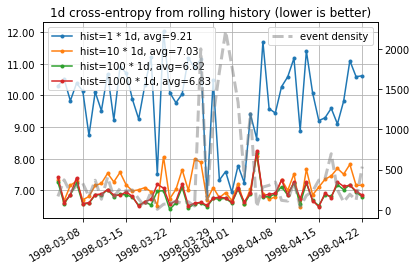

temporal out-sample items, freq=3h, hist_len=1, avg_loss=86.6%, time=0.2s
temporal out-sample items, freq=3h, hist_len=10, avg_loss=45.0%, time=0.2s
temporal out-sample items, freq=3h, hist_len=100, avg_loss=6.1%, time=0.4s
temporal out-sample items, freq=3h, hist_len=1000, avg_loss=1.8%, time=0.6s


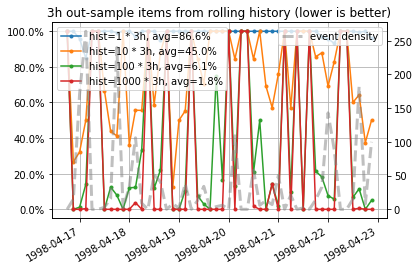

temporal cross-entropy, freq=3h, hist_len=1, avg_loss=11.09, time=0.2s
temporal cross-entropy, freq=3h, hist_len=10, avg_loss=8.69, time=0.2s
temporal cross-entropy, freq=3h, hist_len=100, avg_loss=6.92, time=0.3s
temporal cross-entropy, freq=3h, hist_len=1000, avg_loss=6.81, time=0.5s


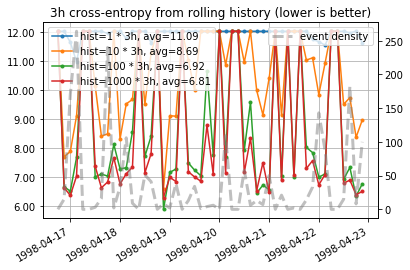


=== session time delta describe ===
count    9.905700e+04
mean     1.921129e+04
std      2.886168e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.700000e+01
max      1.749021e+07
Name: TIMESTAMP, dtype: float64


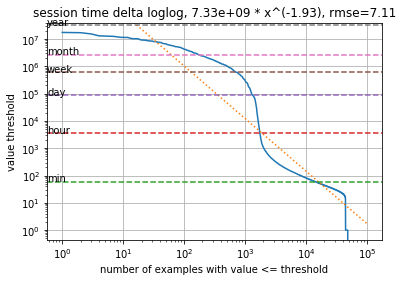

/home/yifeim/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


=== user time span describe ===
count    9.430000e+02
mean     2.018041e+06
std      4.389324e+06
min      1.200000e+02
25%      1.057000e+03
50%      2.961000e+03
75%      7.398970e+05
max      1.836258e+07
Name: TIMESTAMP, dtype: float64


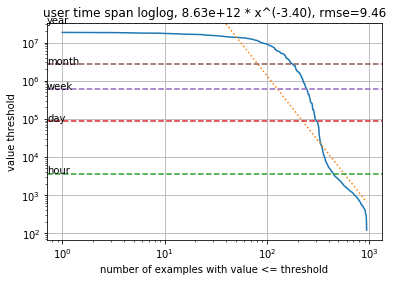

########################################
# DIAGNOSING USERS TABLE, SAMPLE:
########################################
     USER_ID  AGE GENDER  OCCUPATION ZIPCODE
519      520   62      M  healthcare   12603
284      285   25      M  programmer   53713
652      653   31      M   executive   55105
738      739   35      M  technician   73162
845      846   27      M      lawyer   47130
127      128   24      F   marketing   20009
175      176   28      M   scientist   07030
560      561   23      M    engineer   60005
496      497   20      M     student   50112
273      274   20      F     student   55414

=== Users table, original shape=(943, 5) ===

Missing rate of all user meta-data 0.0
User coldstart rate 0.0

=== Describe  ===

              AGE
count  943.000000
mean    34.051962
std     12.192740
min      7.000000
25%     25.000000
50%     31.000000
75%     43.000000
max     73.000000

=== GENDER top 10 categories ===
M    670
F    273
dtype: int64

=== OCCUPATION top 10 categorie

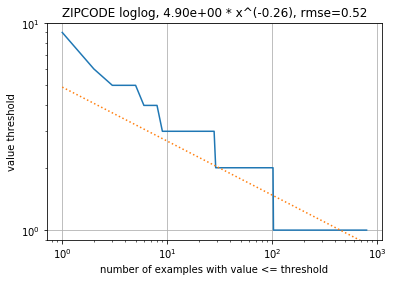

/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:73: UserWarning: 
            Heavy-tail ZIPCODE distributions are usually hard to learn (slope=-0.2606131039384656)!
            Consider rolling up ZIPCODE or dropping its rare values.
            
  """.format(name, slope))


########################################
# DIAGNOSING ITEMS TABLE, SAMPLE:
########################################
      ITEM_ID                                             _TITLE  \
365       366                             Dangerous Minds (1995)   
1035     1036                              Drop Dead Fred (1991)   
263       264                                       Mimic (1997)   
259       260                               Event Horizon (1997)   
1082     1083                            Albino Alligator (1996)   
52         53                        Natural Born Killers (1994)   
1543     1544                                It Takes Two (1995)   
1616     1617                                   Hugo Pool (1997)   
928       929                             Harriet the Spy (1996)   
1213     1214  In the Realm of the Senses (Ai no corrida) (1976)   

      CREATION_TIMESTAMP   _  \
365          788918400.0 NaN   
1035         662688000.0 NaN   
263          872208000.0 NaN   
259    

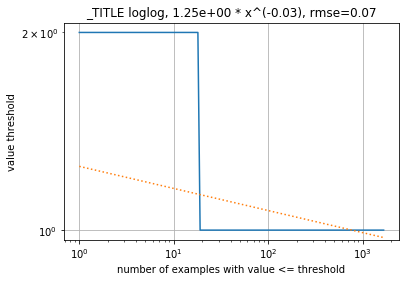

/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:73: UserWarning: 
            Heavy-tail _TITLE distributions are usually hard to learn (slope=-0.0336603600865235)!
            Consider rolling up _TITLE or dropping its rare values.
            
  """.format(name, slope))



=== _IMDb_URL top 10 categories ===
nan                                                                            3
http://us.imdb.com/M/title-exact?Kull+the+Conqueror+(1997)                     2
http://us.imdb.com/M/title-exact?Hugo+Pool+(1997)                              2
http://us.imdb.com/M/title-exact?Liar+(1997)                                   2
http://us.imdb.com/M/title-exact?Ulee%27s+Gold+(1997)                          2
http://us.imdb.com/M/title-exact?Designated%20Mourner%2C%20The%20%281997%29    2
http://us.imdb.com/M/title-exact?Ice+Storm%2C+The+(1997)                       2
http://us.imdb.com/M/title-exact?Chasing+Amy+(1997)                            2
http://us.imdb.com/Title?Hurricane+Streets+(1998)                              2
http://us.imdb.com/M/title-exact?Nightwatch%20(1997)                           2
dtype: int64


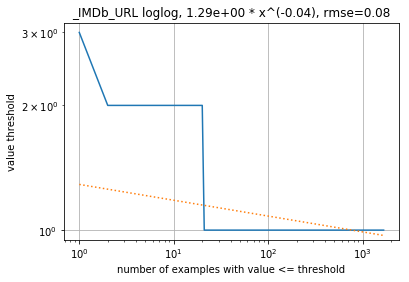

/local/home/yifeim/g/amazon-personalize-samples/diagnose/diagnose.py:73: UserWarning: 
            Heavy-tail _IMDb_URL distributions are usually hard to learn (slope=-0.03824519783286988)!
            Consider rolling up _IMDb_URL or dropping its rare values.
            
  """.format(name, slope))


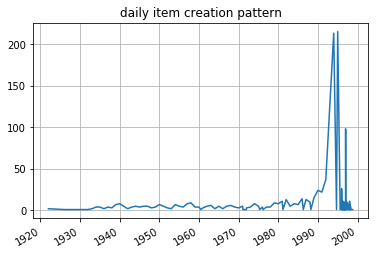

In [7]:
diagnose(interactions, users, items)